In [33]:
import pandas as pd 
data= pd.read_csv ("titanic-passengers.csv",sep=";")
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [34]:
data.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [36]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
data.isnull().sum().sum()

866

In [38]:
mean_age =round(data["Age"].mean())
mean_age 

30

In [39]:
data["Age"].fillna(mean_age,inplace=True)

In [40]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
data["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
C22 C26        3
              ..
A16            1
E63            1
C54            1
B94            1
C104           1
Name: Cabin, Length: 147, dtype: int64

In [42]:
data["Cabin"].fillna("G6",inplace=True)


In [43]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [44]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
data["Embarked"].fillna("S",inplace=True)

In [46]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

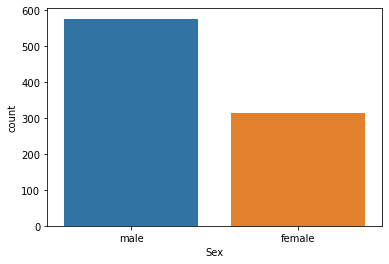

In [47]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.countplot(x="Sex",data=data)
plt.show() 




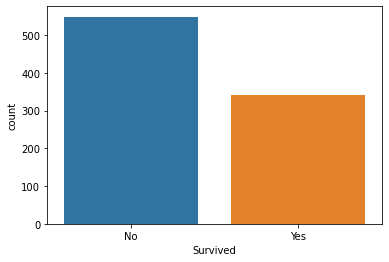

In [48]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.countplot(x="Survived",data=data)
plt.show() 

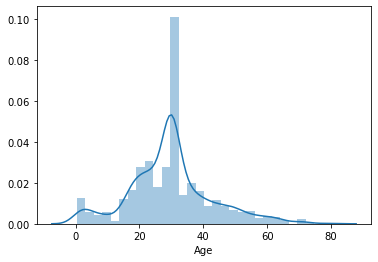

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
  
sns.distplot(data["Age"])         
plt.show()

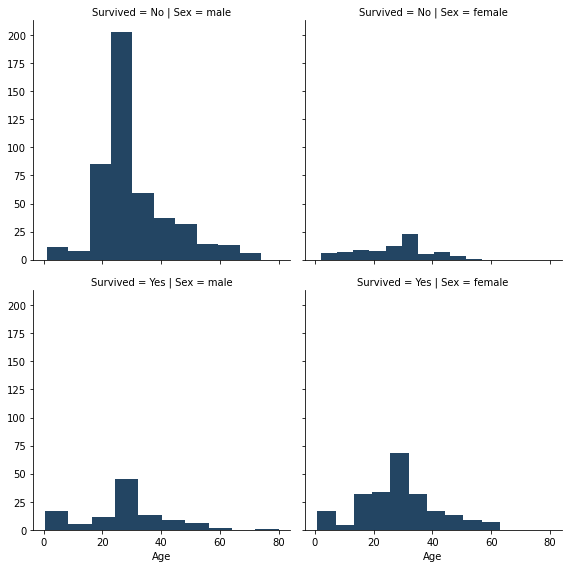

In [50]:
grid=sns.FacetGrid(data ,row="Survived", col="Sex",height=4, aspect=1)
grid.map(plt.hist,"Age", bins=10,color="#234563")



### 

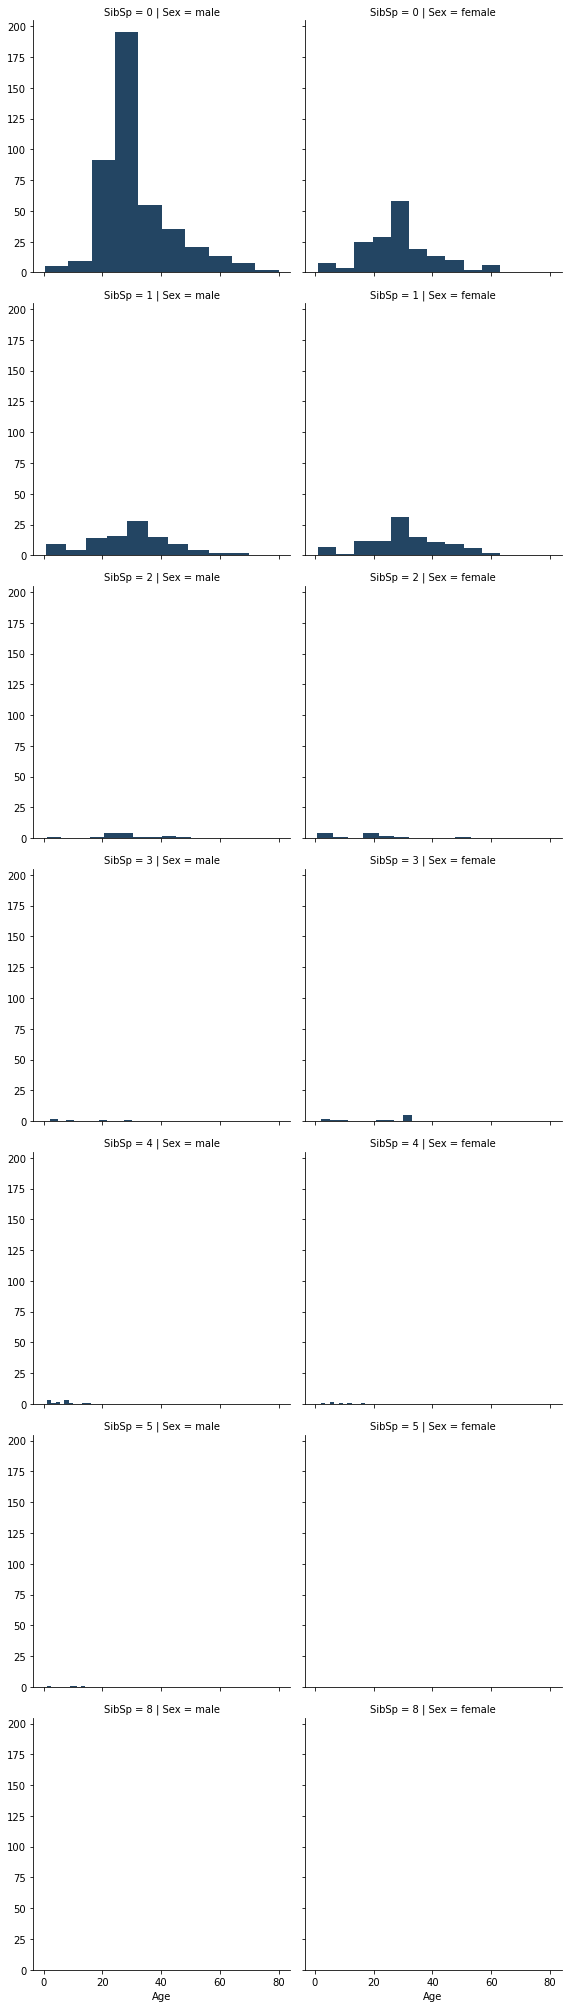

In [51]:
grid=sns.FacetGrid(data ,row="SibSp", col="Sex",height=4, aspect=1)
grid.map(plt.hist,"Age", bins=10,color="#234563")

In [52]:
def plot_correlation_map(df):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

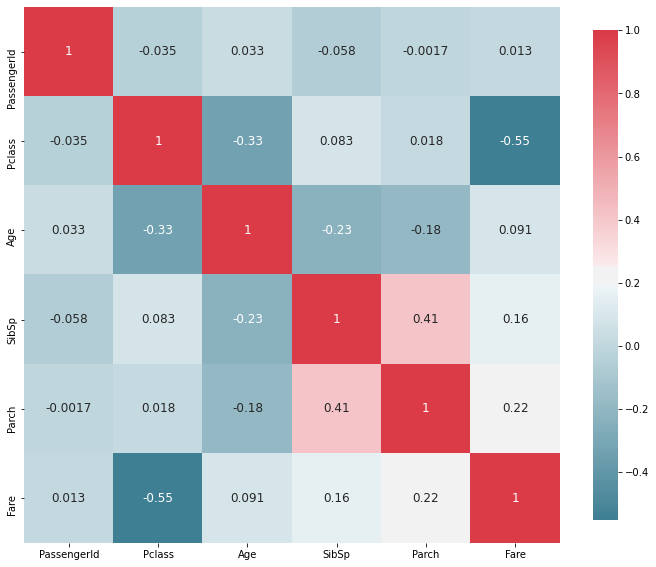

In [53]:
plot_correlation_map(data)

In [56]:
import pandas as pd 
g_mean = data.groupby('Pclass').mean()
print(g_mean)

        PassengerId        Age     SibSp     Parch       Fare
Pclass                                                       
1        461.597222  37.089907  0.416667  0.356481  84.154687
2        445.956522  29.884946  0.402174  0.380435  20.662183
3        439.154786  26.486599  0.615071  0.393075  13.675550


In [60]:
import pandas as pd 
g_mean= data.groupby('Survived').mean()
print(g_mean)

          PassengerId    Pclass        Age     SibSp     Parch       Fare
Survived                                                                 
No         447.016393  2.531876  30.483607  0.553734  0.329690  22.117887
Yes        444.368421  1.950292  28.595526  0.473684  0.464912  48.395408


In [67]:
for dataset in [data]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [68]:
print(data)

     PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                                 ...     ...   ...    ...   
88

In [78]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }


In [84]:
data["Title"]=data["Title"].replace(Title_Dictionary)
print(data["Title"])

0       Mrs
1       Mrs
2       Mrs
3       Mrs
4       Mrs
       ... 
886     Mrs
887     Mrs
888    Miss
889     Mrs
890    Miss
Name: Title, Length: 891, dtype: object


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns  
(data["Title"])              
data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033019,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.329727,0.083081,0.018443,-0.549500
Age,0.033019,-0.329727,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.057527,0.083081,-0.232440,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.180330,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.090632,0.159651,0.216225,1.000000


In [97]:
data["FamilySize"]=((data["SibSp"])+(data["Parch"])) 
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S,Mrs,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S,Mrs,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S,Mrs,4
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C,Mrs,1
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,G6,C,Mrs,0
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,G6,S,Miss,0
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,30.0,0,0,349215,7.8958,G6,S,Mrs,0


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns  
data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.035144,0.033019,-0.057527,-0.001652,0.012658,-0.040143
Pclass,-0.035144,1.000000,-0.329727,0.083081,0.018443,-0.549500,0.065997
Age,0.033019,-0.329727,1.000000,-0.232440,-0.180330,0.090632,-0.248954
SibSp,-0.057527,0.083081,-0.232440,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.018443,-0.180330,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,-0.549500,0.090632,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.065997,-0.248954,0.890712,0.783111,0.217138,1.000000


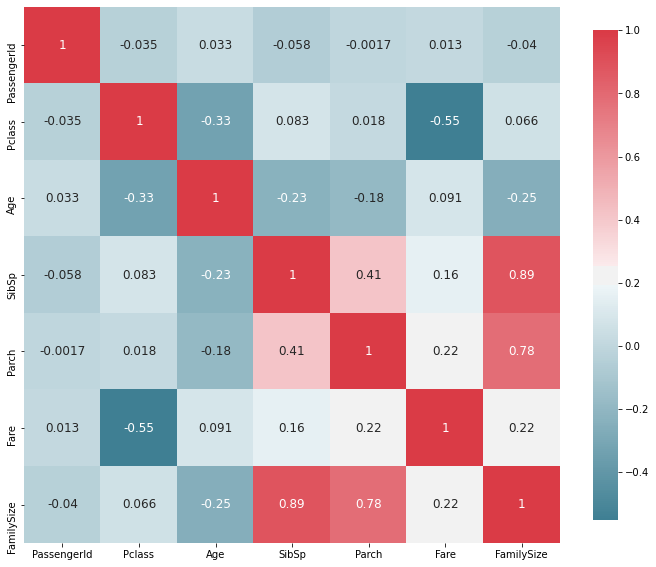

In [103]:
plot_correlation_map(data)


